«Что вершит судьбу человечества в этом мире? Некое незримое существо или закон, подобно длани господней, парящей над миром? По крайней мере, истинно то, что человек не властен даже над своей волей»

# Шапка

Подшапкой я имею в виду код, который необходим для каждой задачи: Импорт библиотек, датасетов.

Этот кусок кода или "Шапку" нужно будет либо написать и исполнить (обязательно надо исполнить) один раз в начале файле, если вы собираетесь использовать формат файла Anaconda (.ipynb), где можно писать код блоками, или если вы хотите писать по программе на каждую задачу, то есть файлы .py, то эту шапку надо будет вставлять в начале каждого файла.

Код в файле имеет две версии: с комментариями и без них. На экзамене лучше использовать тот, что без комментариев, если нас будут просить прикреплять файлы

### Шапка с комментариями:

In [1]:
# Эти пункты копируем без изменений,
# так как это просто библиотеки, которые
# будут применяться в каждой задаче
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import chi2 
from scipy.stats import norm

# Не показывать FutureWarnings
# Не знаю, что это за такие Ворнинги
# Но Артамонов это везде пишит
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# импорт датасета
# Этой строчкой мы импортируем сам датасет
# В рамках тестовой контрольной везде использовался
# один и тот же датасет, поэтому я вынес эту строчку
# в шапку, но на самом экзамене может быть иначе
df = pd.read_csv('TableF5-1.csv') # текст в ковычках название файла датасета
# файл датасета должен находиться в папке с вашим Python файлом

### Шапка без комментариев

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import chi2 
from scipy.stats import norm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('TableF5-1.csv')

# Первая задача

Превый тип задач, который может встретиться является самым простым, так как при решении таких задач не надо ни считать, не писать код. Достаточно иметь общее представление о том, что нас просят сделать, так как ответ на вопрос уже содержится в самом задание.

## Пример задачи:

![Снимок экрана 2025-01-19 в 13.47.53.png](<attachment:Снимок экрана 2025-01-19 в 13.47.53.png>)
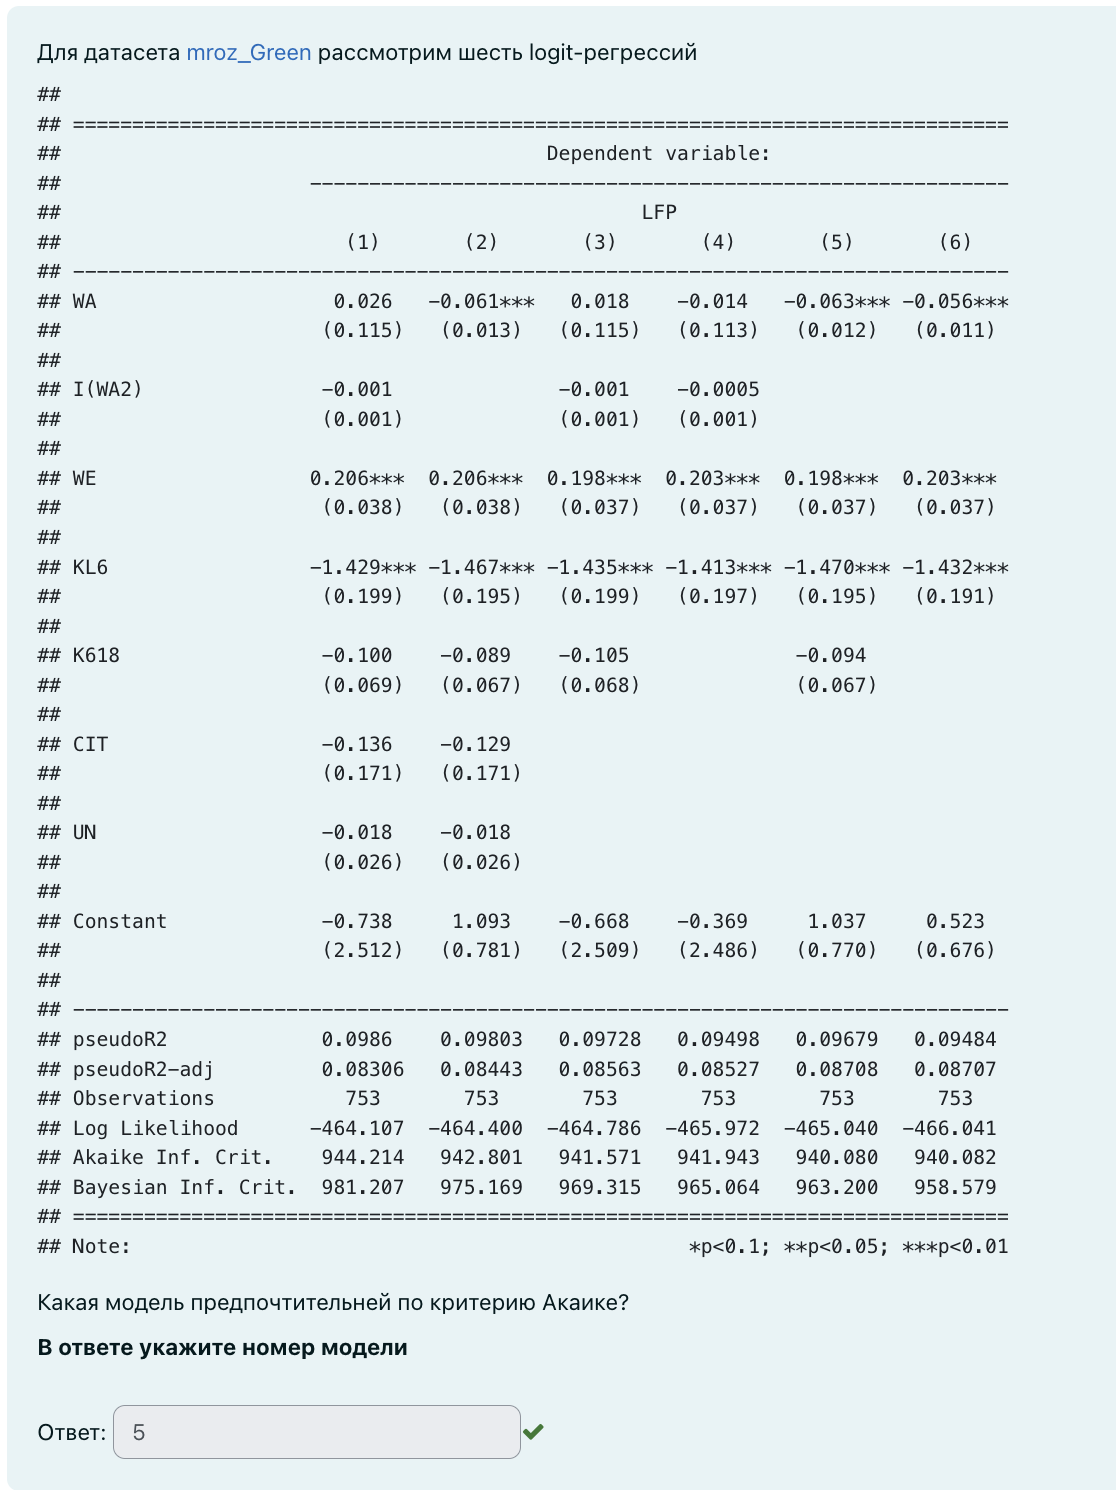

## Как решать:

В данном случае нас просят определить "какая модель предпочтительней по критерию Акаике". Если посмотреть чуть выше, то можно заметить строку, которая так и называется "Akaike Inf. Crit.", а после не требующего сложных действий поиска (напрмер, это можно спросить у чата GPT) легко находиться, что по этому критерию (Akaike) предпочтительной будет та модель, показатель которой наименьший, то есть в этом ряду нужно выбрать наименьшее число. В нашем случае это число 940.080, которое относиться к пятой моделе, поэтому в ответ мы пишем число пять.

Но на экзамене нас наверняка могут попросить определить предпочтительную моедель не только по критериб Акаике. Поэтому даю сводку как определять такие модели по другим критериям (ответ сгенерирован с помощью чата GPT, но в его точности я достаточно уверен, но если кто-то из тех, кто шарит, заметит не точность, то не поленитесь исправить):

В дополнение к критерию Акаике (AIC), для выбора предпочтительной модели можно использовать следующие критерии и подходы:
1. Критерий Байеса (BIC)
BIC учитывает не только качество подгонки модели, но и ее сложность, штрафуя за количество параметров более строго, чем AIC.
Предпочтительна модель с наименьшим значением BIC.
Если модели сравнимы по AIC и BIC, предпочтение отдается той, которая оптимальна по обоим критериям.
2. Псевдо-R2 (pseudoR2) и его скорректированное значение (pseudoR2-adj)
Псевдо-R2 показывает, насколько хорошо модель объясняет данные.
Предпочтительна модель с наибольшим значением псевдо-R2 и скорректированного псевдо-R2.
Однако псевдо-R2 не всегда следует рассматривать как основной критерий, так как он не учитывает переобучение.
3. Логарифм правдоподобия (Log Likelihood)
Чем выше значение логарифма правдоподобия, тем лучше модель подгоняет данные.
Однако этот критерий также не учитывает сложность модели, поэтому лучше сочетать его с AIC или BIC.
4. Значимость коэффициентов
Оцениваются p-значения коэффициентов (звездочки в таблице).
Предпочтительна модель, где ключевые переменные статистически значимы (p < 0.05 или хотя бы p < 0.1).
Если коэффициенты ключевых переменных незначимы, модель может быть неприменима для интерпретации.

# Вторая задача

В этой и дальнейших задачах уже придеться писать код. Поэтому если вы выбрали путь написания отдельной программы под каждую задачу, то не забывайте вставлять так называемую "Шапку".

## Пример задачи:

![Снимок экрана 2025-01-19 в 14.26.05.png](<attachment:Снимок экрана 2025-01-19 в 14.26.05.png>)
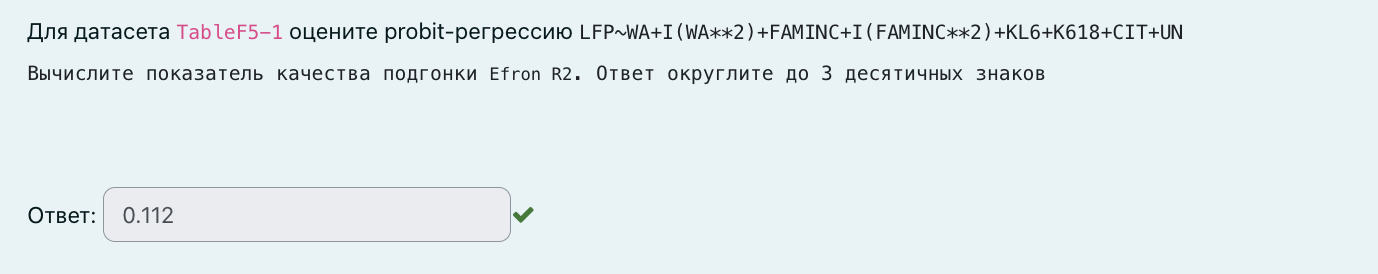

## Как рашать:

### Код с комментариями:

In [9]:
mod = smf.probit(formula = 'LFP~WA+I(WA**2)+FAMINC+I(FAMINC**2)+KL6+K618+CIT+UN', data = df) # В этой строчке всегда надо
# всегда обращать внимание на два места: где написано "probit" и на текст в кавычках после "formula = "
# В первом случаем мы пишим пробит, потому что по условю задачи мы оцениваем probit-регрессию
# Если в условие будет logit-регрессия или LPM-регрессия, то писать мы будем вместо "smf.logit"
# А что касается формулы, то нужно не забывать её копировать из условия задния (И такое случалось)
res = mod.fit()
(1-(np.sum(res.resid_response**2))/(res.nobs*np.var(mod.endog))).round(3) # Чтобы изменить то, как программа
# округляет чилсо нужно изменить число в скабках при ".round(3)", в данном случае число будет округляться до
# трех знаков после запятой

# Эта формула взята из файла Артомонова
# Файл находиться на GitHub в jupyter-notebooks/List25/probit-goodness-of-fit.ipynb
# Там много разных формул, в данном случае у нас просят Efron R2
# Если что-то другое просят, то находим в файле нужную, копируем, вставляем.
# Только нужно обратить внимание, что переменные в файле названы по другому, так как
# там он тестирует несколько моделей, например, вместо "res" в файле это будет называться "res_1".
# Название надо сменить, иначе код не запуститься.



# После исполнения кода в конце будет строчка типа "np.float64(0.112)"
# Число 0.112 и будет ответом

Optimization terminated successfully.
         Current function value: 0.625515
         Iterations 5


np.float64(0.112)

### Код без комментариев:

In [5]:
mod = smf.probit(formula = 'LFP~WA+I(WA**2)+FAMINC+I(FAMINC**2)+KL6+K618+CIT+UN', data = df)
res = mod.fit()
(1-(np.sum(res.resid_response**2))/(res.nobs*np.var(mod.endog))).round(3)

Optimization terminated successfully.
         Current function value: 0.625515
         Iterations 5


np.float64(0.112)

# Третья задача

В этой и дальнейших задачах комментарив буду оставлять всё меньше и меньше, так как то, что уже объяснялось до этого повоторно объяснять не буду

## Пример задачи:

![Снимок экрана 2025-01-19 в 15.19.40.png](<attachment:Снимок экрана 2025-01-19 в 15.19.40.png>)
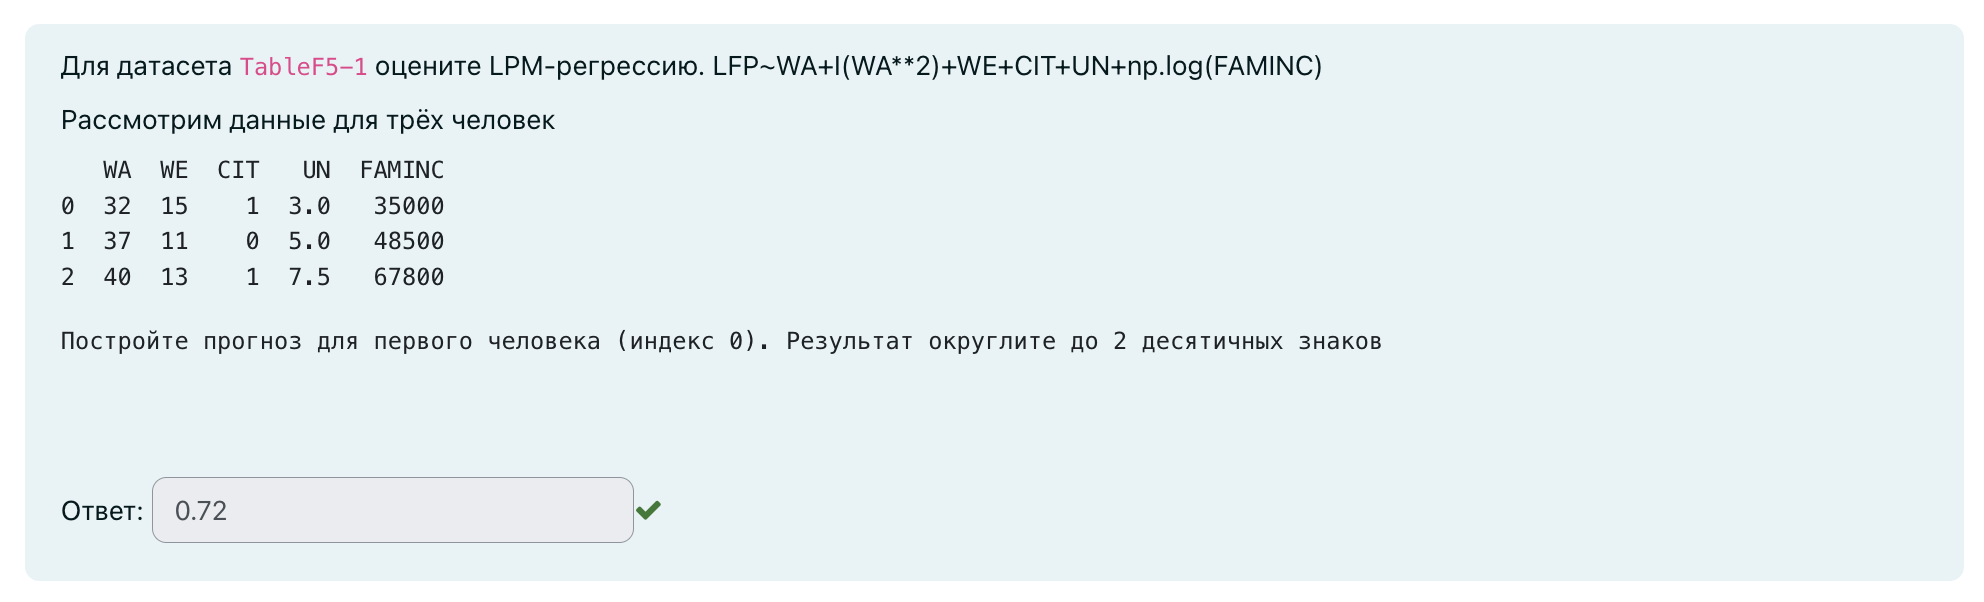

## Как решать:

### Код с комментариями:

In [3]:
mod = smf.logit(formula='LFP~WA+I(WA**2)+WE+CIT+UN+np.log(FAMINC)', data=df) # спецификация модели
res = mod.fit() # подгонка модели

# Создаем датафрейм с новыми данными регрессоров для прогноза
new_data = pd.DataFrame({'WA':[32],  
                         'WE': [15], 
                         'CIT': [1],
                         'UN': [3.0], 
                         'FAMINC': [35000],}) # Здесь нужно вписать данные из таблички, которая
# данна в здании. Копируем названия в нужные места и значения из того ряда, который указан в задании.
# В данном случае в условии написано "Постройте прогноз для первого человека (индекс 0)", вот раз индек 0,
# то и циферки берем из ряда 0

# Прогноз для LPM с округлением до 3-х десятичных знаков
res.predict(exog=new_data, transform=True).round(2)

# После исполнения нас интересует строчка, в которой будет написано типа "0   0.72"
# нам нужна вторая цифра, которая и будет ответом

NameError: name 'smf' is not defined

### Код без комментариев:

In [8]:
mod = smf.logit(formula='LFP~WA+I(WA**2)+WE+CIT+UN+np.log(FAMINC)', data=df)
res = mod.fit() 

new_data = pd.DataFrame({'WA':[32],  
                         'WE': [15], 
                         'CIT': [1],
                         'UN': [3.0], 
                         'FAMINC': [35000],}) 
res.predict(exog=new_data, transform=True).round(2)

Optimization terminated successfully.
         Current function value: 0.655878
         Iterations 5


0    0.72
dtype: float64

# Четвертая задача

## Пример задачи:

![Снимок экрана 2025-01-19 в 15.31.27.png](<attachment:Снимок экрана 2025-01-19 в 15.31.27.png>)
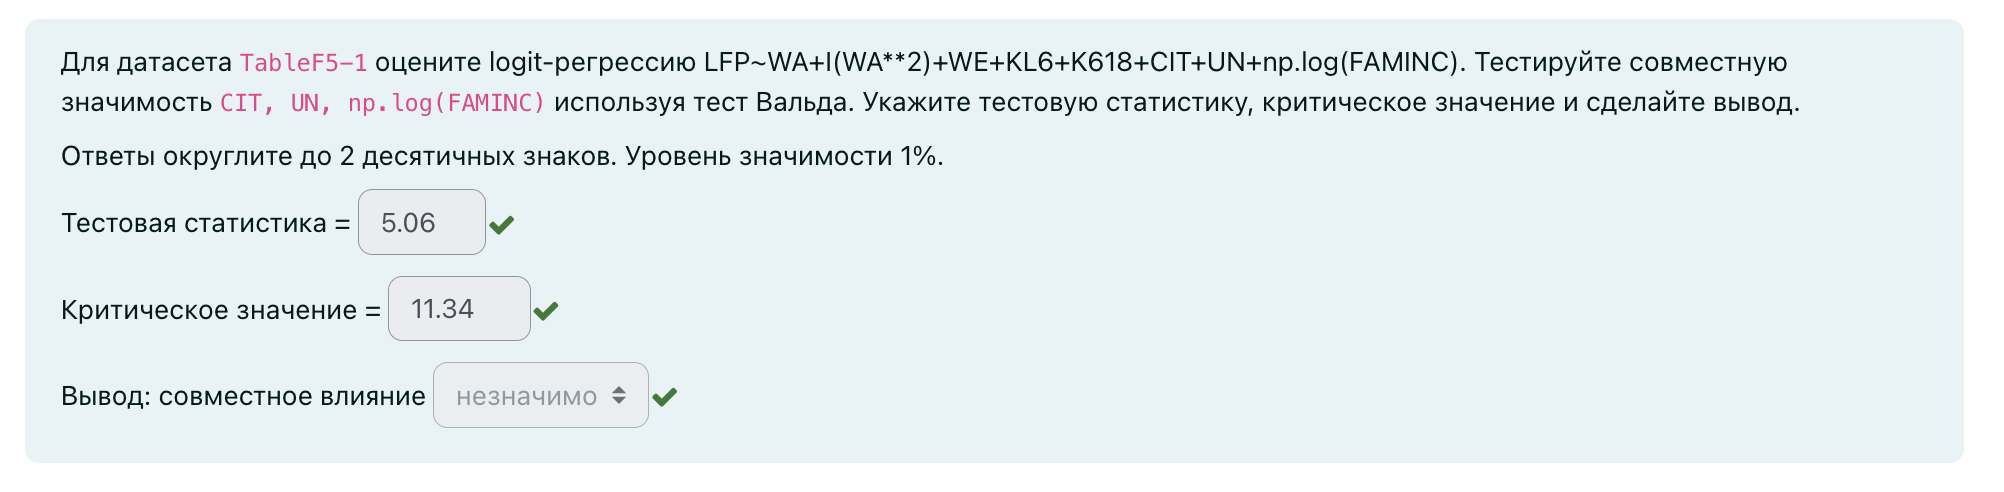

## Как решать:

В этой задаче код может выглядеть чуть странно, так как это исправленный код чата GPT, но своё дело он делает.

### Код с комментариями:

In [2]:
#  Лучше тут ничего особо не менять, а то прилюбом удобном случае код уходит в ощибку :)
mod = smf.logit(formula='LFP~WA+I(WA**2)+WE+KL6+K618+CIT+UN+np.log(FAMINC)', data=df) # спецификация модели
res = mod.fit() # подгонка модели
res.nobs # число наблюдений, на которых была подогнана модель

restricted_vars = ['CIT', 'UN', 'np.log(FAMINC)'] # Здесь мы пишем те, наименования по которым нам нужно
# тестировать совместную значимость по условию задачи
r_matrix = np.zeros((len(restricted_vars), len(res.params)))
for i, var in enumerate(restricted_vars):
    r_matrix[i, res.params.index.get_loc(var)] = 1

wald_test = res.wald_test(r_matrix)
wald_stat = wald_test.statistic[0][0]
p_value = wald_test.pvalue
df = len(restricted_vars)

# Критическое значение для уровня значимости 1%
critical_value = chi2.ppf(1 - 0.01, df) # Если уровень значимости в условии другой,
# то вместо числа 0.01, которое соответсвует уровню значимости в 1%, нужно будет написать
# своё число: 5% - 0.05, 10% - 0.1

# Вывод
print(f"Тестовая статистика: {wald_stat:.2f}") # Если в задаче требуется не два, три
print(f"Критическое значение: {critical_value:.2f}") # знака после запятой, то вместо
# ".2f" нужно написать .3f в обеих строчках

# Проверка гипотезы
if wald_stat > critical_value:
    print("Гипотеза H0 отвергается: CIT, UN, log(FAMINC) совместно значимы.")
else:
    print("Гипотеза H0 не отвергается: CIT, UN, log(FAMINC) совместно незначимы.")
    
# Код иногда уходит в ошибку при повторном исполнении. В этом случаем нужно перезагрузить ядро
# (Для этого обычно сверху есть стрелочка завернутая в кружок(ну как смог описал) с надписью
# рядом "Restart") после чего нужно снова исполнить код шапки, а затем исполнять этот код

Optimization terminated successfully.
         Current function value: 0.613860
         Iterations 5
Тестовая статистика: 5.06
Критическое значение: 11.34
Гипотеза H0 не отвергается: CIT, UN, log(FAMINC) совместно незначимы.


### Код без комментариев:

In [2]:
mod = smf.logit(formula='LFP~WA+I(WA**2)+WE+KL6+K618+CIT+UN+np.log(FAMINC)', data=df)
res = mod.fit()
res.nobs

restricted_vars = ['CIT', 'UN', 'np.log(FAMINC)']
r_matrix = np.zeros((len(restricted_vars), len(res.params)))
for i, var in enumerate(restricted_vars):
    r_matrix[i, res.params.index.get_loc(var)] = 1

wald_test = res.wald_test(r_matrix)
wald_stat = wald_test.statistic[0][0]
p_value = wald_test.pvalue
df = len(restricted_vars)

critical_value = chi2.ppf(1 - 0.01, df)

print(f"Тестовая статистика: {wald_stat:.2f}")
print(f"Критическое значение: {critical_value:.2f}")

if wald_stat > critical_value:
    print("Гипотеза H0 отвергается: CIT, UN, log(FAMINC) совместно значимы.")
else:
    print("Гипотеза H0 не отвергается: CIT, UN, log(FAMINC) совместно незначимы.")

Optimization terminated successfully.
         Current function value: 0.613860
         Iterations 5
Тестовая статистика: 5.06
Критическое значение: 11.34
Гипотеза H0 не отвергается: CIT, UN, log(FAMINC) совместно незначимы.


# Пятая задача:

## Пример задачи:

![Снимок экрана 2025-01-19 в 16.12.58.png](<attachment:Снимок экрана 2025-01-19 в 16.12.58.png>)
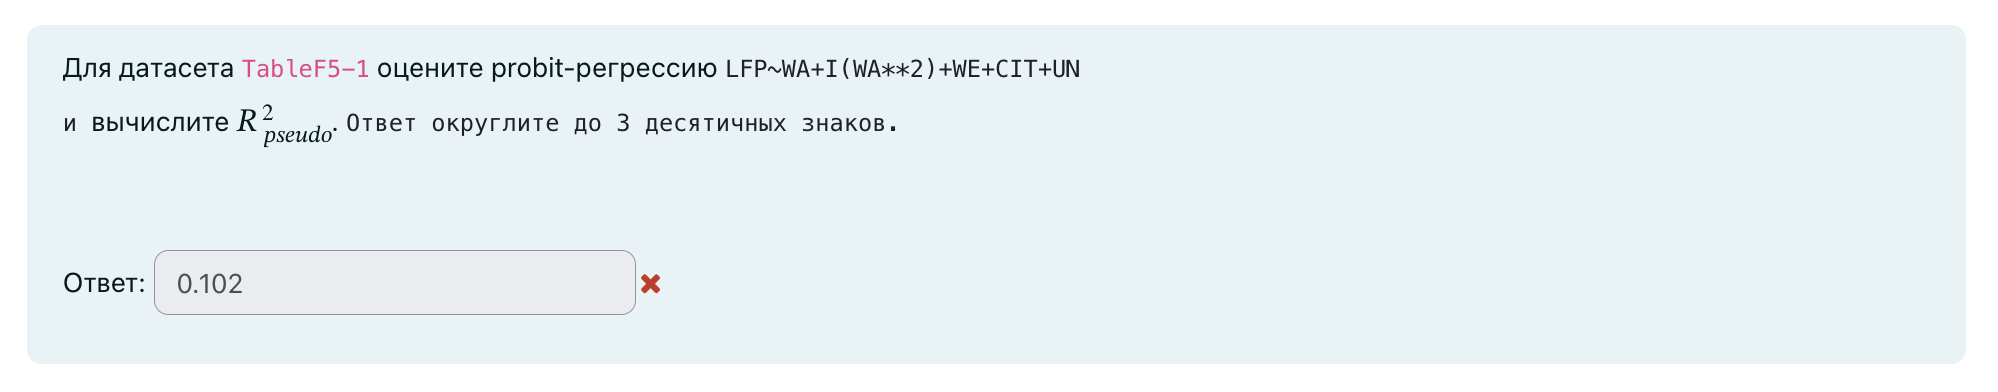

## Как решать:

Эта задача почти точно такая же как и вторая, только здесь нужно применить другую формулу. Эти формулы находятся всё так же в файле probit-goodness-of-fit.ipynb
Только надо быть чуть внимательнее, нарпимер, в случае этой задачи нас просят найти R2-pseudo, но если зайти файл такого заглавия не будет. Конкретно эта формула называется McDadden's R2, и чтобы понять, что нам нужна именно она достаточно посмотреть как Артомонов этот McDadden's R2 - в самой формуле уже написано R2-pseudo, поэтому именно ей мы и воспользуемся.

### Код с комментариями:

In [10]:
mod = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+CIT+UN', data = df) # Напоминаю, что нельзя забывать
# копировать формулу из задания. В этом задании у меня ошибка именно из-за этого
res = mod.fit()
res.prsquared.round(3)
# В ответ мы пишем число внутри np.float64, например, "np.float64(0.036)"

Optimization terminated successfully.
         Current function value: 0.659103
         Iterations 5


np.float64(0.036)

### Код без комментариев:

In [11]:
mod = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+CIT+UN', data = df)
res = mod.fit()
res.prsquared.round(3)

Optimization terminated successfully.
         Current function value: 0.659103
         Iterations 5


np.float64(0.036)

# Шестая задача

 ## Пример задачи:


![Снимок экрана 2025-01-19 в 16.27.32.png](<attachment:Снимок экрана 2025-01-19 в 16.27.32.png>)
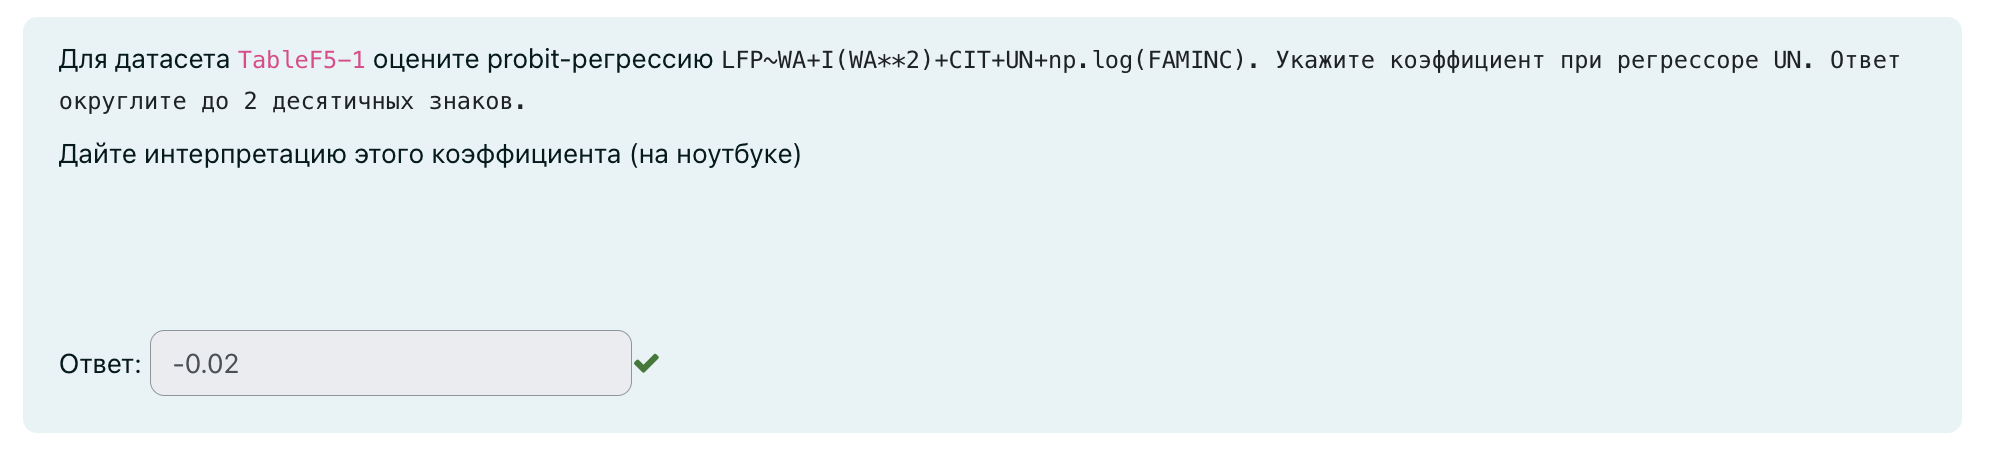

## Как решать:

В этом задании произошло какое-то колдунство, если честно. Потому что по заданию просят оценить probit-регрессию, а я запутавшись оценевую logit, но при этом получаю правильный ответ, а если выполнять это заданее правильно, то ответ получается другой. Короче, если кто-то разбирается, то дайте пояснение.

### Код с комментариями:

In [13]:
mod = smf.logit(formula='LFP~WA+I(WA**2)+CIT+UN+np.log(FAMINC)', data=df) # спецификация модели
res = mod.fit() # подгонка модели
res.params.round(2)
# Смотрим коэфициент при нужном нам по усвию регрессоре.
# В данном случаем это UN. Это и будет ответ

Optimization terminated successfully.
         Current function value: 0.666843
         Iterations 5


Intercept        -8.49
WA                0.17
I(WA ** 2)       -0.00
CIT              -0.17
UN               -0.02
np.log(FAMINC)    0.59
dtype: float64

### Код без комментариев:

In [14]:
mod = smf.logit(formula='LFP~WA+I(WA**2)+CIT+UN+np.log(FAMINC)', data=df) 
res = mod.fit() 
res.params.round(2)

Optimization terminated successfully.
         Current function value: 0.666843
         Iterations 5


Intercept        -8.49
WA                0.17
I(WA ** 2)       -0.00
CIT              -0.17
UN               -0.02
np.log(FAMINC)    0.59
dtype: float64

# Седьмая задача

## Пример задачи:

![Снимок экрана 2025-01-19 в 16.46.29.png](<attachment:Снимок экрана 2025-01-19 в 16.46.29.png>)
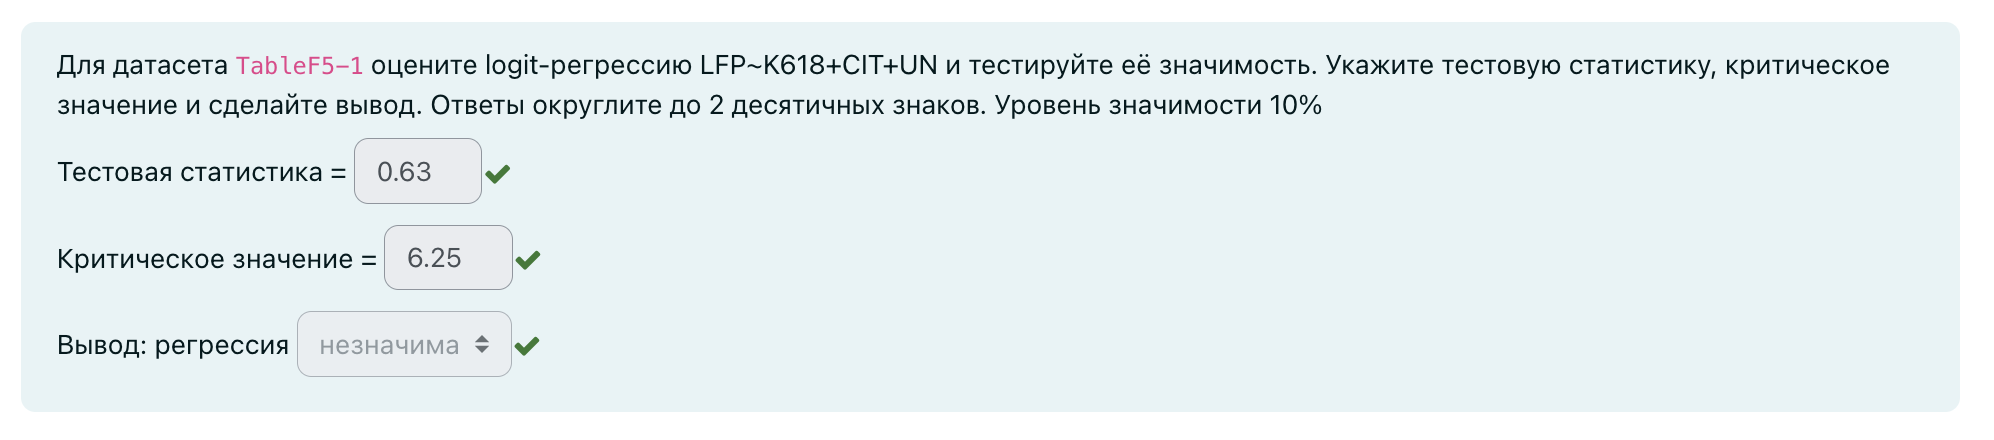

## Как решать:

### Код с комментариями:

In [ ]:
mod = smf.logit(formula='LFP~K618+CIT+UN', data=df) # спецификация модели
res = mod.fit() # подгонка модели
res.summary() # отчет (Вообще строчка не обязательная, но в файле Артомонова так)

Optimization terminated successfully.
         Current function value: 0.683347
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LFP   No. Observations:                  753
Model:                          Logit   Df Residuals:                      749
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:               0.0006074
Time:                        16:50:43   Log-Likelihood:                -514.56
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                    0.8906
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4420      0.238      1.855      0.064      -0.025       0.909
K618          -0.0031      0.056     -0.056      0.955      -0.113       0.106
CIT           -0.0043      0.156     -0.028      0.978      -0.311       0.302
UN            -0.0185      0.024     -0.769      0.442      -0.066       0.029
==============================================================================
"""

In [20]:
# Тестовая статистика LR-теста
res.llr.round(2)
# Пишем этот ответ в поле "Тестовая статистика"

np.float64(0.63)

In [21]:

sign_level = 0.1 # уровень значимости
chi2.ppf(q=1-sign_level, df=res.df_model).round(2)
# Пишем этот ответ в поле "Критическое значение"

# Затем сравниваем эти два значения. Если Тестовая статистика больше, чем
# Критическое значение, то регрессия значима, если меньше, то не значима

np.float64(6.25)

### Код без комментариев:

In [22]:
mod = smf.logit(formula='LFP~K618+CIT+UN', data=df)
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.683347
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LFP   No. Observations:                  753
Model:                          Logit   Df Residuals:                      749
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:               0.0006074
Time:                        16:56:01   Log-Likelihood:                -514.56
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                    0.8906
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4420      0.238      1.855      0.064      -0.025       0.909
K618          -0.0031      0.056     -0.056      0.955      -0.113       0.106
CIT           -0.0043      0.156     -0.028      0.978      -0.311       0.302
UN            -0.0185      0.024     -0.769      0.442      -0.066       0.029
==============================================================================
"""

In [23]:
res.llr.round(2)

np.float64(0.63)

In [24]:
sign_level = 0.1
chi2.ppf(q=1-sign_level, df=res.df_model).round(2)

np.float64(6.25)

# Восьмая задача

## Пример задачи:

![Снимок экрана 2025-01-19 в 16.57.31.png](<attachment:Снимок экрана 2025-01-19 в 16.57.31.png>)
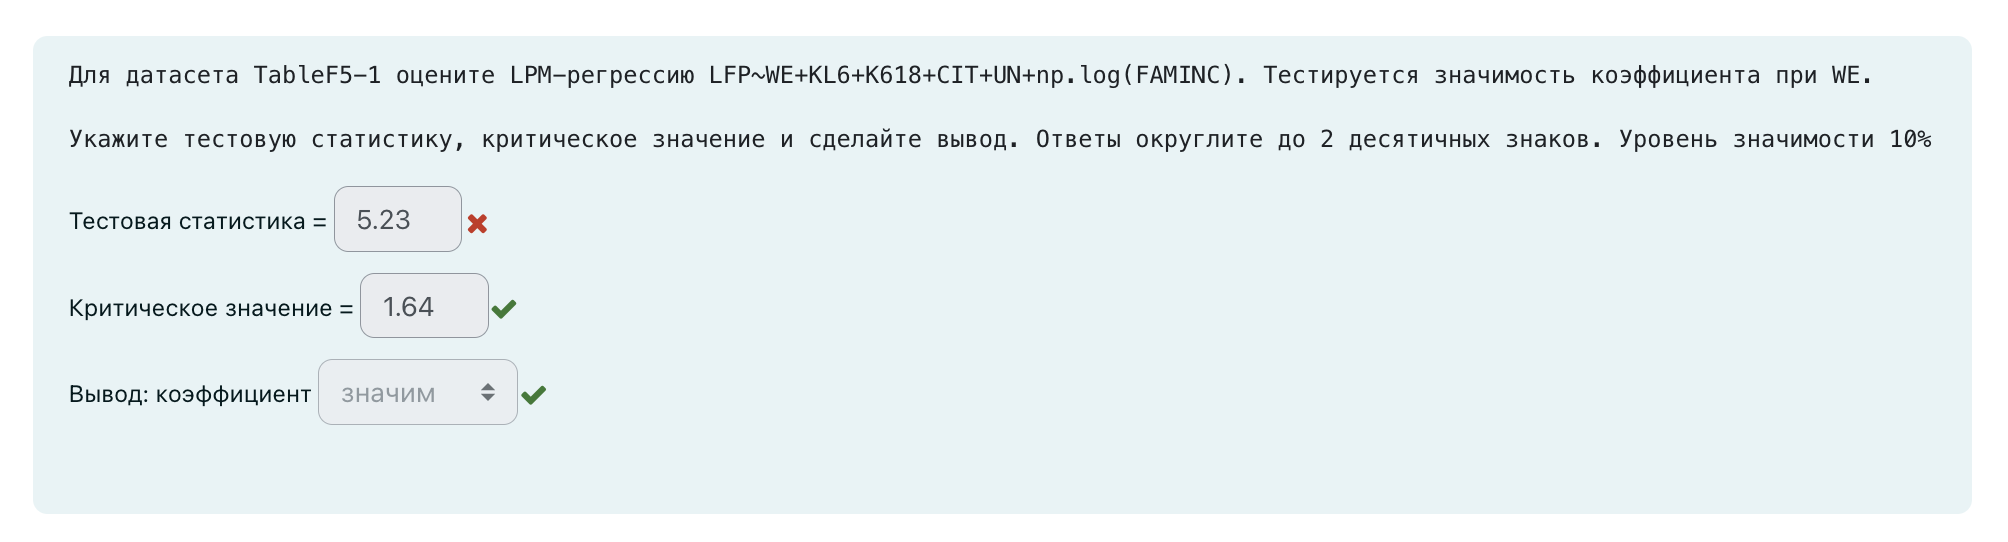

## Как решать:

### Код с комментариями:

In [25]:
mod = smf.logit(formula='LFP~WE+KL6+K618+CIT+UN+np.log(FAMINC)', data=df) # спецификация модели
# Напоминаю копировать формулу) Тут один из ответов не правильный как раз из-за этого
res = mod.fit() # подгонка модели
res.summary() # отчет

Optimization terminated successfully.
         Current function value: 0.631705
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LFP   No. Observations:                  753
Model:                          Logit   Df Residuals:                      746
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                 0.07613
Time:                        17:01:31   Log-Likelihood:                -475.67
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 7.648e-15
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.3882      1.572     -2.792      0.005      -7.469      -1.308
WE                 0.2028      0.040      5.122      0.000       0.125       0.280
KL6               -1.0154      0.165     -6.169      0.000      -1.338      -0.693
K618               0.0509      0.059      0.856      0.392      -0.066       0.167
CIT               -0.2753      0.173     -1.595      0.111      -0.614       0.063
UN                -0.0287      0.025     -1.129      0.259      -0.078       0.021
np.log(FAMINC)     0.2808      0.168      1.668      0.095      -0.049       0.611
==================================================================================
"""

In [26]:
# Критическое значение
sign_level = 0.1
norm.ppf(q=1-sign_level/2).round(2)
# Этот ответ пишем в поле "Критическое значение"

np.float64(1.64)

In [27]:
# тестовые z-статистики для каждого коэффциента с округленим
res.tvalues.round(2)

# Первый комментарий - это комментарий Артамонова из файла.
# Почему-то он называет это в своем файле z-статистика (гойда)
# Хотя это та самая тестовая статистика, которая нам нужна.

# Чтобы получить ответ смотрим на тот коэффициент, который указан по условию.
# В нашем случае "WE". Затем пишем это значение в поле "Тестовая статистика"
# Затем сравниваем значение: если коэффициент больше критического значения, то он
# значим, если меньше, то не значим

Intercept        -2.79
WE                5.12
KL6              -6.17
K618              0.86
CIT              -1.60
UN               -1.13
np.log(FAMINC)    1.67
dtype: float64

### Код без комментариев

In [31]:
mod = smf.logit(formula='LFP~WE+KL6+K618+CIT+UN+np.log(FAMINC)', data=df)
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.631705
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LFP   No. Observations:                  753
Model:                          Logit   Df Residuals:                      746
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                 0.07613
Time:                        17:15:01   Log-Likelihood:                -475.67
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 7.648e-15
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.3882      1.572     -2.792      0.005      -7.469      -1.308
WE                 0.2028      0.040      5.122      0.000       0.125       0.280
KL6               -1.0154      0.165     -6.169      0.000      -1.338      -0.693
K618               0.0509      0.059      0.856      0.392      -0.066       0.167
CIT               -0.2753      0.173     -1.595      0.111      -0.614       0.063
UN                -0.0287      0.025     -1.129      0.259      -0.078       0.021
np.log(FAMINC)     0.2808      0.168      1.668      0.095      -0.049       0.611
==================================================================================
"""

In [32]:
sign_level = 0.1
norm.ppf(q=1-sign_level/2).round(2)

np.float64(1.64)

In [33]:
res.tvalues.round(2)

Intercept        -2.79
WE                5.12
KL6              -6.17
K618              0.86
CIT              -1.60
UN               -1.13
np.log(FAMINC)    1.67
dtype: float64

# Девятая задача

## Пример задачи:

![Снимок экрана 2025-01-19 в 17.07.39.png](<attachment:Снимок экрана 2025-01-19 в 17.07.39.png>)
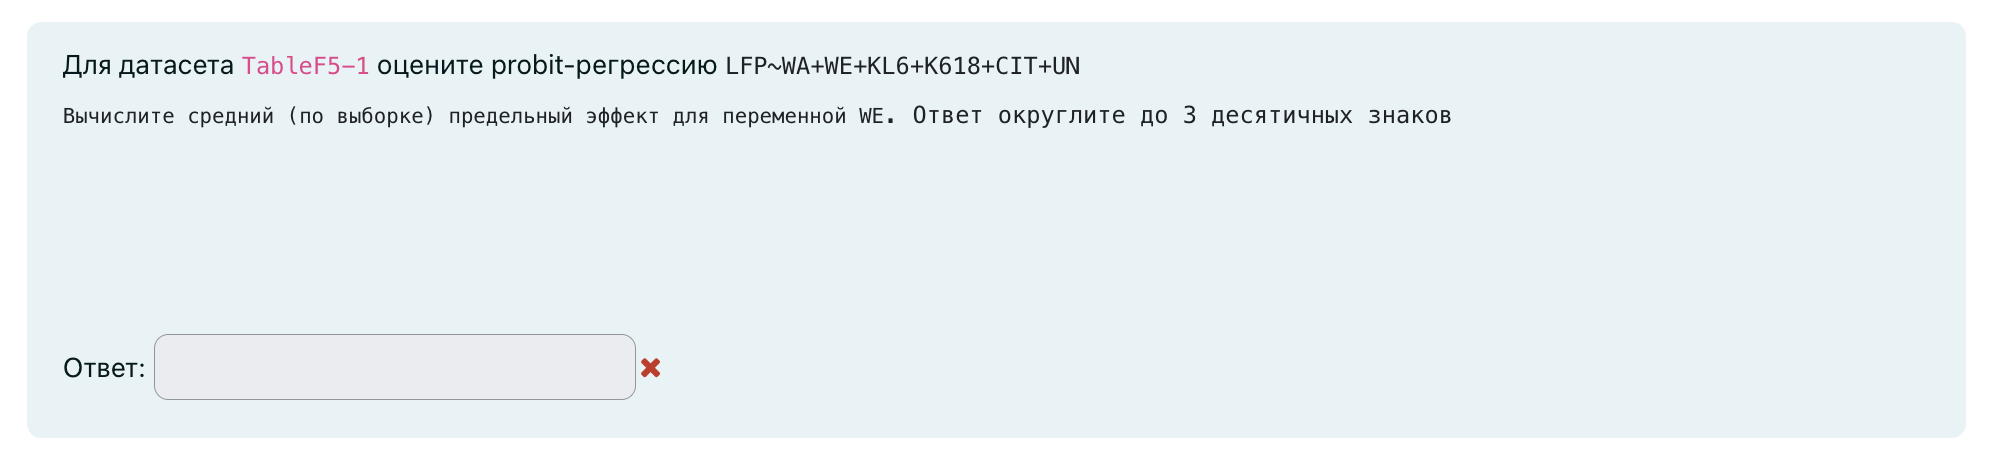

## Как решать:

В случае если в условии требуют нечто иное от "Вычислите средний (по выборке) предельный эффект для переменной WE", например, "Вычислить предельный эффект" (в общем, без приписки по выборке) или что-то подобного рода, то рекомендую открыть файл jupyter-notebooks/List24/probit-marginal-values.ipynb
В комментариях подробнее объясню, что делать, но в кратце нужно будет заменить одно слово в коде.

### Код с комментариями:

In [41]:
mod = smf.probit(formula='LFP~WA+WE+KL6+K618+CIT+UN', data=df)
res = mod.fit()

margeff_res = res.get_margeff(at='overall') # Вот в случае если в условию требуют что-то отличное,
# нужно будте заменить "overall" на "mean"
margeff_res.summary_frame()

# После исполнения кода у нас появиться табличка, в которой надо просто выбрать значение признака,
# указанного в условии (в нашем случае WE), в колонке dy/dx (В нашем случае получится 0.043819)
# Как округлять здесь я не знаю... Но я думаю, что все умеют это делать и без компьютеров
# Ах да, это число и будет нашим ответом

Optimization terminated successfully.
         Current function value: 0.616871
         Iterations 5


,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
WA,-0.013079,0.002522,-5.186021,2.148351e-07,-0.018022,-0.008136
WE,0.043819,0.007494,5.847095,5.002317e-09,0.029131,0.058507
KL6,-0.310880,0.034608,-8.982960,2.635784e-19,-0.378710,-0.243050
K618,-0.018605,0.014115,-1.318145,1.874552e-01,-0.046269,0.009059
CIT,-0.026094,0.036566,-0.713618,4.754634e-01,-0.097763,0.045574
UN,-0.003914,0.005513,-0.709971,4.777221e-01,-0.014719,0.006891


### Код без комментариев:

In [ ]:
mod = smf.probit(formula='LFP~WA+WE+KL6+K618+CIT+UN', data=df)
res = mod.fit()

margeff_res = res.get_margeff(at='overall') 
margeff_res.summary_frame()

 # Десятая задача

## Пример задачи:

![Снимок экрана 2025-01-19 в 17.10.14.png](<attachment:Снимок экрана 2025-01-19 в 17.10.14.png>)
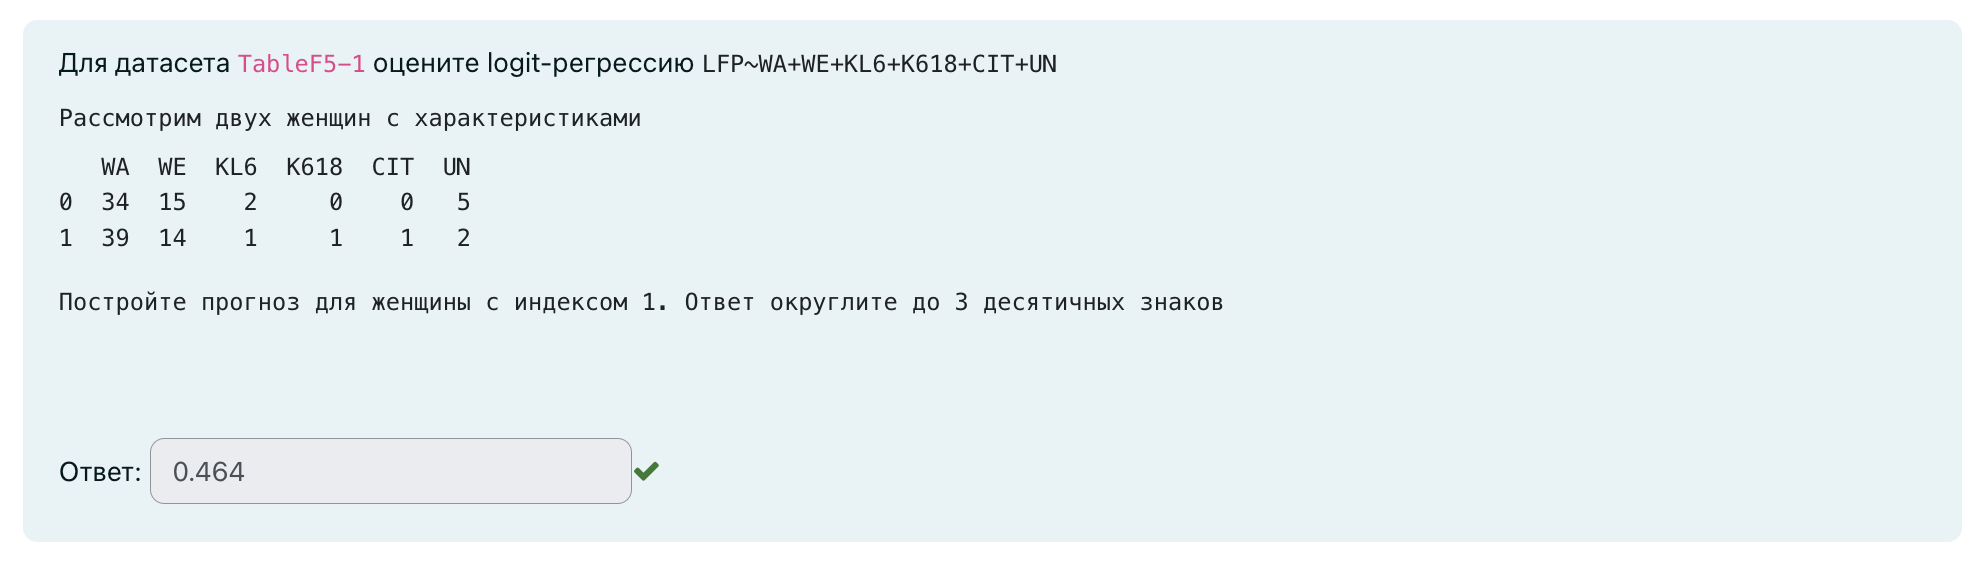

## Как решать:

Эта задача очень похожа на третью, так что считай уже решали.

### Код с комментариями

In [29]:
mod = smf.logit(formula='LFP~WA+WE+KL6+K618+CIT+UN', data=df) # спецификация модели
res = mod.fit() # подгонка модели

# Создадим датафрейм с новыми данными регрессоров для прогноза
new_data = pd.DataFrame({'WA':[39],  
                         'WE': [14], 
                         'KL6': [1],
                         'K618': [1], 
                         'CIT': [1],
                         'UN': [2],})
# Прогноз для LPM с округлением до 3-х десятичных знаков
res.predict(exog=new_data, transform=True).round(3)

Optimization terminated successfully.
         Current function value: 0.616734
         Iterations 5


0    0.464
dtype: float64

### Код без комментариев

In [30]:
mod = smf.logit(formula='LFP~WA+WE+KL6+K618+CIT+UN', data=df)
res = mod.fit()

new_data = pd.DataFrame({'WA':[39],  
                         'WE': [14], 
                         'KL6': [1],
                         'K618': [1], 
                         'CIT': [1],
                         'UN': [2],})

res.predict(exog=new_data, transform=True).round(3)

Optimization terminated successfully.
         Current function value: 0.616734
         Iterations 5


0    0.464
dtype: float64